## **Part 1: Data Exploration**

Load the important libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the Dataset

In [4]:
df=pd.read_csv("/content/train_data.csv")

Read the First 10 rows of the dataset

In [5]:
df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


Check if the dataset has any null values or not

In [6]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Find the 5 number summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


Now we split the address column entries in order to separate 

In [8]:
df['ADDRESS'].str.split(",")

0                    [Ksfc Layout, Bangalore]
1                [Vishweshwara Nagar, Mysore]
2                         [Jigani, Bangalore]
3              [Sector-1 Vaishali, Ghaziabad]
4                         [New Town, Kolkata]
                         ...                 
29446                 [Shamshabad Road, Agra]
29447    [E3-108,  Lake View Recidency, Vapi]
29448                    [Ajmer Road, Jaipur]
29449               [Sholinganallur, Chennai]
29450                     [Jagatpura, Jaipur]
Name: ADDRESS, Length: 29451, dtype: object

we extract the cities from the address column and define a new column which stored these cities

In [9]:
df['CITY']=df['ADDRESS'].str.split(",").str.get(1)

we make three new empty lists for Tier 1, Tier 2, Tier 3 cities

In [10]:
df['TIER1']=""
df['TIER2']=""
df['TIER3']=""

we create two lists containing the Tier 1 and Tier 2 cities

In [11]:
tier1 = ["Ahmedabad", "Bangalore", "Chennai", "Delhi", "Hyderabad", "Kolkata", "Mumbai", "Pune"]
tier2=['Agra', 'Ajmer', 'Aligarh','Amravati','Amritsar','Asansol','Aurangabad','Bareilly','Belgaum','Bhavnagar','Bhiwandi','Bhopal','Bhubaneswar','Bikaner','Bilaspur','Bokaro Steel City','Chandigarh','Coimbatore','Cuttack','Dehradun','Dhanbad','Bhilai','Durgapur','Erode','Faridabad','Firozabad','Ghaziabad','Gorakhpur','Gulbarga','Guntur','Gwalior','Gurugram','Guwahati','Hamirpur','Hubli–Dharwad','Indore','Jabalpur','Jaipur','Jalandhar','Jalgaon','Jammu','Jamnagar','Jamshedpur','Jhansi','Jodhpur','Kakinada','Kannur','Kanpur','Karnal','Kochi','Kolhapur','Kollam','Kozhikode','Kurnool','Ludhiana','Lucknow','Madurai','Malappuram','Mathura','Mangalore','Meerut','Moradabad','Mysore','Nagpur','Nanded','Nashik','Nellore','Noida','Patna','Puducherry','Purulia','Prayagraj','Raipur','Rajkot','Rajamahendravaram','Ranchi','Rourkela','Ratlam','Salem','Sangli','Shimla','Siliguri','Solapur','Srinagar','Surat','Thanjavur','Thiruvananthapuram','Thrissur','Tiruchirappalli','Tirunelveli','Tiruvannamalai','Ujjain','Vijayapura','Vadodara','Varanasi','Vasai-Virar City','Vijayawada','Visakhapatnam','Vellore' ,'Warangal']

we define a function mapping_tier1 which returns 1 if the city is present in the list tier1 and 0 if not in tier1

In [12]:
def mapping_tier1(city):

    if city in tier1:
        return 1    
    else:
        return 0

df['TIER1'] = df['CITY'].apply(mapping_tier1)

we define a function mapping_tier2 which returns 1 if the city is present in the list tier2 and 0 if not in tier2

In [13]:
def mapping_tier2(city):

    if city in tier2:
        return 1    
    else:
        return 0

df['TIER2'] = df['CITY'].apply(mapping_tier2)

If the city is not present in both tier1 and tier2 then we return 1 in tier3 which is defined using the function mapping_tier3

In [14]:
def mapping_tier3(city):

    if city in tier1:
        return 0
    elif city in tier2:
        return 0    
    else:
        return 1

df['TIER3'] = df['CITY'].apply(mapping_tier3)

since we have extracted tier 1, tier 2 and tier 3 cities, we drop the address and cities columns

In [15]:
df.drop(['ADDRESS','CITY'],axis=1)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),TIER1,TIER2,TIER3
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,1,0,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,1,0,0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,0,1,0
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,0,1,0
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,1,0,0


## **Part 2: EDA**

we plot the histogram for the target column- TARGET(PRICE_IN_LACS)

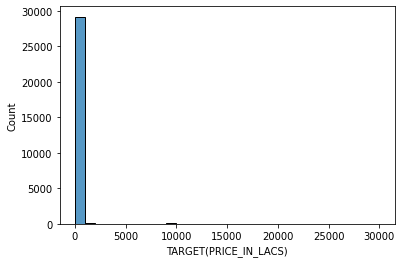

In [16]:
sns.histplot(data=df,x='TARGET(PRICE_IN_LACS)',bins=30)

we plot the countplot in order to see the number of rooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


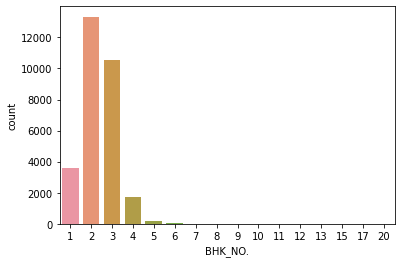

In [17]:
sns.countplot(df["BHK_NO."])

we plot the countplot in order to see the number of buildings still under construction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


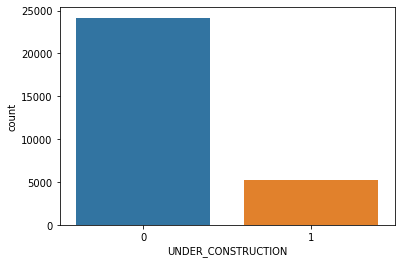

In [18]:
sns.countplot(df["UNDER_CONSTRUCTION"])

we plot the countplot for the column resale in order to see the number of houses for resale

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


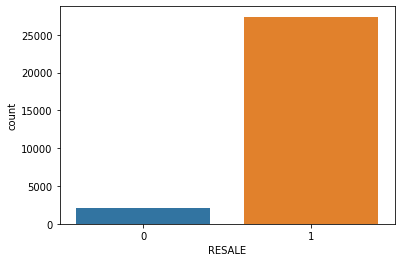

In [19]:
sns.countplot(df["RESALE"])

In order to see the correlation of columns with each other we plot heatmap

[]

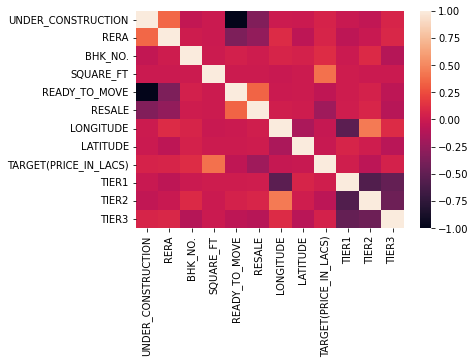

In [20]:
sns.heatmap(df.corr())
plt.plot()

we drop the column UNDER_CONSTRUCTION since not many houses are under construction

In [21]:
df.drop(['UNDER_CONSTRUCTION'],axis=1)

,POSTED_BY,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,TIER1,TIER2,TIER3
0,Owner,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore,1,0,0
1,Dealer,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore,0,1,0
2,Owner,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore,1,0,0
3,Owner,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad,0,1,0
4,Dealer,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra,0,1,0
29447,Owner,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,Vapi",39.945409,-86.150721,16.0,Lake View Recidency,0,0,1
29448,Dealer,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur,0,1,0
29449,Owner,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai,1,0,0


We use get_dummies() to convert categorical variable into dummy/indicator variables. we use it on two columns: POSTED_BY and BHK_0R_RK

In [22]:
df1 = pd.get_dummies(df, columns = ['POSTED_BY', 'BHK_OR_RK'])
print(df1)

       UNDER_CONSTRUCTION  RERA  BHK_NO.    SQUARE_FT  READY_TO_MOVE  RESALE  \
0                       0     0        2  1300.236407              1       1   
1                       0     0        2  1275.000000              1       1   
2                       0     0        2   933.159722              1       1   
3                       0     1        2   929.921143              1       1   
4                       1     0        2   999.009247              0       1   
...                   ...   ...      ...          ...            ...     ...   
29446                   0     0        3  2500.000000              1       1   
29447                   0     0        2   769.230769              1       1   
29448                   0     0        2  1022.641509              1       1   
29449                   0     0        2   927.079009              1       1   
29450                   0     1        2   896.774194              1       1   

                                ADDRESS

we find the variance inflation factor of every column in order to check for multicollinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = df1[['UNDER_CONSTRUCTION','RERA','BHK_NO.','SQUARE_FT','READY_TO_MOVE','RESALE','LONGITUDE','LATITUDE','TIER1','TIER2',
            'TIER3','POSTED_BY_Builder','POSTED_BY_Dealer','POSTED_BY_Owner','BHK_OR_RK_BHK','BHK_OR_RK_RK']] 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
# calculating VIF for each feature 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 

                          for i in range(len(X.columns))] 

  

print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


               feature       VIF
0   UNDER_CONSTRUCTION       inf
1                 RERA  1.250392
2              BHK_NO.  1.037216
3            SQUARE_FT  1.000285
4        READY_TO_MOVE       inf
5               RESALE  1.587718
6            LONGITUDE  1.533752
7             LATITUDE  1.040466
8                TIER1       inf
9                TIER2       inf
10               TIER3       inf
11   POSTED_BY_Builder       inf
12    POSTED_BY_Dealer       inf
13     POSTED_BY_Owner       inf
14       BHK_OR_RK_BHK       inf
15        BHK_OR_RK_RK       inf


#model fitting

In [24]:
#in our dataset TARGET(PRICE_IN_LACS) is the dependent variable and RERA, BHK_NO., SQUARE_FT, RESALE, LONGITUDE, LATITUDE are the independent variable
target_feature='TARGET(PRICE_IN_LACS)'

#separate feature for target feature
y=df[target_feature]

#separate feature for input feature
X=df[['RERA','BHK_NO.','SQUARE_FT','RESALE','LONGITUDE','LATITUDE']]

we import train_test_split from sklearn.model_selection and we split the dataset into training and testing variables where test_size is 0.2 which implies we are using 80% of the data to train the model and 20% of the data to test the model.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

we first fit the data into the linear regression model

In [26]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

then we find the intercept

In [27]:
regr.intercept_
print('intercept (b) is : ',regr.intercept_)

intercept (b) is :  636.2723202706264


and the regression coefficient

In [28]:
regr.coef_
print('ceofficient (m) is : ',regr.coef_)

ceofficient (m) is :  [ 2.38788747e+01  8.72026146e+01  1.28745588e-04 -5.45811274e+02
 -3.70136446e+00 -1.61529538e+00]


finally we predict the target variable

In [29]:
y_pred=regr.predict(X_test)

we import statsmodel and fit the data in order to get the statistical insights from the data

With this p-value, you can check for the
significance of the independent variables in
explaining the regression model and we know that if p<0.05 then the variable is significant.

In [30]:
import statsmodels.api as sm
model = sm.OLS(y_pred,X_test).fit()
predictions = model.predict(X_test) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          3.306e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:42:13   Log-Likelihood:                         -32960.
No. Observations:                5891   AIC:                                  6.593e+04
Df Residuals:                    5885   BIC:                                  6.597e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In order to remove multicollinearity we need to do PCA but before e need to standardize the data for which we use feature scaling.

In [31]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5
0  0.964509  0.032439 -0.131671 -0.013010 -0.918530 -0.968329
1  0.328220 -1.106923 -0.469214 -0.004613  0.202552 -1.608179
2  3.156932 -1.869753 -0.124989  0.000678 -0.168356  1.549663
3  0.336630 -0.958355  0.553039 -0.026615  0.648642 -1.638761
4 -1.101321 -0.516667  0.364903 -0.026858  1.060103 -0.175150

Size: 
(23560, 6)


after transforming the data we again fit the data into the linear regression model

In [32]:
regr1=LinearRegression()
regr1.fit(X_pca,y_train)

LinearRegression()

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_scaled = sc.fit_transform(X_test)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
X_test_pca = pca.fit_transform(X_test_scaled)

# Get the transformed dataset
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.head())
print("\nSize: ")
print(X_test_pca.shape)

          0         1         2         3         4         5
0  5.940317  8.089870 -9.708466  3.487268  7.813996  1.053940
1 -0.290103  0.698549 -0.556924  0.062764 -0.639953  0.587743
2 -0.907919 -0.423102 -0.331378  0.017953  0.136466  0.138540
3  2.937148 -2.280871  0.297273 -0.008853  0.445959  1.230011
4  0.987552  0.652496  1.267555 -0.119392  1.093690 -1.407902

Size: 
(5891, 6)


In [34]:
y_pred1=regr1.predict(X_test_pca)

In [35]:
model = sm.OLS(y_pred1,X_test_pca).fit()
predictions1 = model.predict(X_test_pca) 
print_model1 = model.summary()
print(print_model1)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              3620.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:42:13   Log-Likelihood:                         -37649.
No. Observations:                5891   AIC:                                  7.531e+04
Df Residuals:                    5885   BIC:                                  7.535e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

now we implement lasso and ridge and compare the results

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [37]:
y_pred_lasso=lasso.predict(X_test)

In [38]:
model_lasso = sm.OLS(y_pred_lasso,X_test).fit()
predictions_lasso = model_lasso.predict(X_test) 
print_model_lasso = model_lasso.summary()
print(print_model_lasso)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          3.391e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:42:13   Log-Likelihood:                         -32860.
No. Observations:                5891   AIC:                                  6.573e+04
Df Residuals:                    5885   BIC:                                  6.577e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

now we implement polynomial regression of degree 2

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [40]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 289.50286892211386
R2 score of training set is 0.8025994450861911


The model performance for the test set
-------------------------------------------
RMSE of test set is 1287.3761474990235
R2 score of test set is -2.6105056574564935


Now for all the models I have fitted till now, we
make a bar plot of RMSE, and see for which model
it is minimum.

lowest RMSE:- 305.55928524758144 at k value = 3


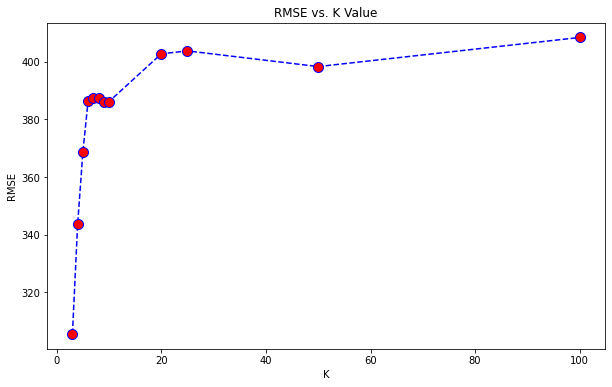

[305.55928524758144, 343.8026914325452, 368.75108686594285, 386.5400895079243, 387.5986719637908, 387.3124743184173, 386.2180375424308, 386.2082409044417, 402.7835203812494, 403.7777099956244, 398.3444047668024, 408.44470051028213]


In [44]:
from sklearn.neighbors import KNeighborsRegressor
rmse_test_knn=[]
k_values=[3,4,5,6,7,8,9,10,20,25,50,100]
for i in k_values: 
  knnr = KNeighborsRegressor(n_neighbors=i)
  knnr.fit(X_train, y_train)
  y_pred_knn=knnr.predict(X_test)
  rmse_test_knn.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))

plt.figure(figsize=(10,6))
plt.plot(k_values,rmse_test_knn,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE')
print("lowest RMSE:-",min(rmse_test_knn),"at k value =",k_values[rmse_test_knn.index(min(rmse_test_knn))])
plt.show()
print(rmse_test_knn)